# How to use pyHomogeneity package functions : a brief example

The **Daily Female Births Dataset**  is used here for demonstrating the use of this package. This dataset describes the number of daily female births in California in 1959. This dataset is available in [here](https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv).


In [1]:
import numpy as np
import pandas as pd
import pyhomogeneity as hg
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

# read all datasets
Birth_data = pd.read_csv("daily-total-female-births.csv")
Birth_data.index = pd.to_datetime(Birth_data.Date,format='%d/%m/%Y')
Birth_data.drop('Date', axis=1,inplace=True)

In [2]:
Birth_data.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


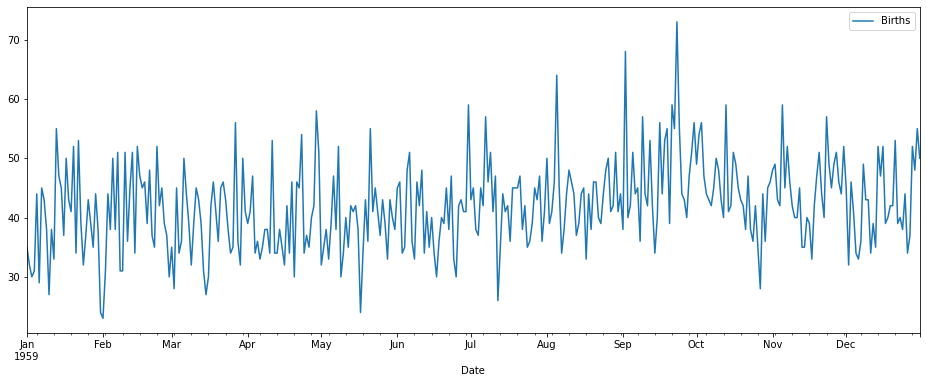

In [3]:
Birth_data.plot(figsize=(16,6));

In [4]:
pettitt_res = hg.pettitt_test(Birth_data, alpha=0.05)
pettitt_res

Pettitt_Test(h=True, cp='1959-06-29', p=0.0, U=12088.0, avg=mean(mu1=39.638888888888886, mu2=44.25945945945946))

In [5]:
snht_res = hg.snht_test(Birth_data, sim=10000)
snht_res

SNHT_Test(h=True, cp='1959-06-29', p=0.0, T=36.072304319229644, avg=mean(mu1=39.638888888888886, mu2=44.25945945945946))

In [6]:
buishand_res = hg.buishand_u_test(Birth_data)
buishand_res

Buishand_U_Test(h=True, cp='1959-06-29', p=0.0, U=3.219805485858549, avg=mean(mu1=39.638888888888886, mu2=44.25945945945946))

All homogeneity test shows that there is a significant change-point in this dataset. Because the **p-value** is smaller than **alpha=0.05** and **h=True**. The change-point is located at **1959-06-29**. The mean value of before and after change-point is  **39.638888888888886** and **44.25945945945946**.

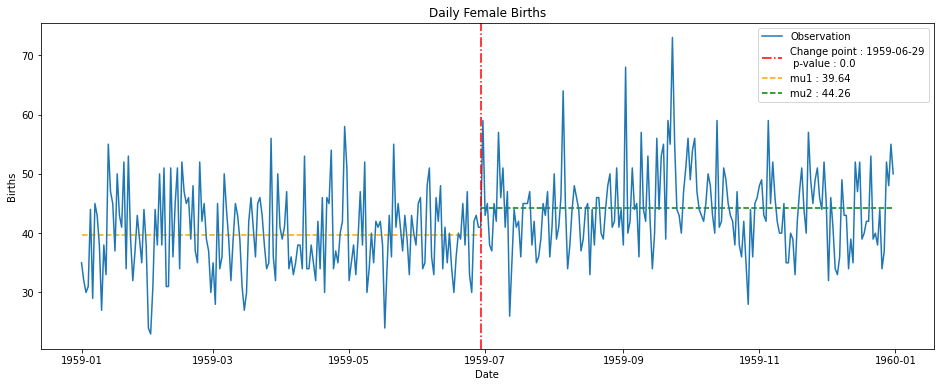

In [7]:
result = pettitt_res

mn = Birth_data.index[0]
mx = Birth_data.index[-1]

loc = pd.to_datetime(result.cp)
mu1 = result.avg.mu1
mu2 = result.avg.mu2

plt.figure(figsize=(16,6))
plt.plot(Birth_data, label="Observation")
plt.hlines(mu1, xmin=mn, xmax=loc, linestyles='--', colors='orange',lw=1.5, label='mu1 : ' + str(round(mu1,2)))
plt.hlines(mu2, xmin=loc, xmax=mx, linestyles='--', colors='g', lw=1.5, label='mu2 : ' + str(round(mu2,2)))
plt.axvline(x=loc, linestyle='-.' , color='red', lw=1.5, label='Change point : '+ loc.strftime('%Y-%m-%d') + '\n p-value : ' + str(result.p))

plt.title('Daily Female Births')
plt.xlabel('Date')
plt.ylabel('Births')
plt.legend(loc='upper right')

# plt.savefig("F:/aaaaaa.jpg", dpi=600)